<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%209/Assignment_9_Step%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install asgnmt9-0.0.0-py3-none-any.whl


## Updates in this trial

> Changing the learning rate to 0.1

In [0]:
from torchvision import transforms
from asgnmt8.DataLoader import cifar_data_loader,View_images
transform_params = dict()
transform_params['train'] = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      #  transforms.Grayscale(num_output_channels=3), 
                                      #  transforms.RandomCrop(32, padding=4),  
                                       transforms.RandomRotation(10),
                                       transforms.RandomHorizontalFlip(),
                                      #  transforms.RandomVerticalFlip(),  
                                       transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                       transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

transform_params['test'] = transforms.Compose([# transforms.RandomHorizontalFlip(),
                                      #  transforms.Grayscale(num_output_channels=3), 
                                      #  transforms.RandomCrop(32, padding=4),  
                                      #  transforms.RandomRotation(10),  
                                      #  transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                      #  transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader,testloader = cifar_data_loader(transform_params,BatchSize=250)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import torch

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

from asgnmt8.resnet import ResNet18
net = ResNet18().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
from asgnmt8.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9,weight_decay = 0.00005)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

for epoch in range(30):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    scheduler.step()
    acc = tt.test_(net, device, testloader)  
    
   
print('Finished Training')

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.6525959968566895 Batch_id=199 Accuracy=28.65: 100%|██████████| 200/200 [00:36<00:00,  5.46it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -1.9434, Accuracy: 3925/10000 (39.25%)

EPOCH: 1


Loss=1.38811194896698 Batch_id=199 Accuracy=43.74: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.7537, Accuracy: 5000/10000 (50.00%)

EPOCH: 2


Loss=1.1987640857696533 Batch_id=199 Accuracy=52.08: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.4979, Accuracy: 5805/10000 (58.05%)

EPOCH: 3


Loss=1.0339072942733765 Batch_id=199 Accuracy=59.80: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.0147, Accuracy: 6425/10000 (64.25%)

EPOCH: 4


Loss=0.8638144135475159 Batch_id=199 Accuracy=64.80: 100%|██████████| 200/200 [00:36<00:00,  5.45it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.5018, Accuracy: 6895/10000 (68.95%)

EPOCH: 5


Loss=0.992557168006897 Batch_id=199 Accuracy=68.24: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.2121, Accuracy: 7096/10000 (70.96%)

EPOCH: 6


Loss=0.7069177627563477 Batch_id=199 Accuracy=70.96: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.6807, Accuracy: 7396/10000 (73.96%)

EPOCH: 7


Loss=0.73748779296875 Batch_id=199 Accuracy=73.41: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.1802, Accuracy: 7435/10000 (74.35%)

EPOCH: 8


Loss=0.6911326050758362 Batch_id=199 Accuracy=75.94: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.1091, Accuracy: 7521/10000 (75.21%)

EPOCH: 9


Loss=0.6151260733604431 Batch_id=199 Accuracy=78.04: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.6316, Accuracy: 7908/10000 (79.08%)

EPOCH: 10


Loss=0.5228044390678406 Batch_id=199 Accuracy=79.48: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.1981, Accuracy: 7918/10000 (79.18%)

EPOCH: 11


Loss=0.5533122420310974 Batch_id=199 Accuracy=80.92: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.7602, Accuracy: 8195/10000 (81.95%)

EPOCH: 12


Loss=0.4905681014060974 Batch_id=199 Accuracy=82.27: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.8791, Accuracy: 8220/10000 (82.20%)

EPOCH: 13


Loss=0.506321907043457 Batch_id=199 Accuracy=83.13: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.9571, Accuracy: 8237/10000 (82.37%)

EPOCH: 14


Loss=0.4393855333328247 Batch_id=199 Accuracy=84.31: 100%|██████████| 200/200 [00:36<00:00,  5.55it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.7750, Accuracy: 8236/10000 (82.36%)

EPOCH: 15


Loss=0.5959376096725464 Batch_id=199 Accuracy=85.28: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.8894, Accuracy: 8380/10000 (83.80%)

EPOCH: 16


Loss=0.347773015499115 Batch_id=199 Accuracy=86.10: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.0850, Accuracy: 8439/10000 (84.39%)

EPOCH: 17


Loss=0.32272228598594666 Batch_id=199 Accuracy=86.98: 100%|██████████| 200/200 [00:36<00:00,  5.53it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.7748, Accuracy: 8525/10000 (85.25%)

EPOCH: 18


Loss=0.4112500846385956 Batch_id=199 Accuracy=87.27: 100%|██████████| 200/200 [00:36<00:00,  5.55it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.8735, Accuracy: 8382/10000 (83.82%)

EPOCH: 19


Loss=0.283096045255661 Batch_id=199 Accuracy=88.10: 100%|██████████| 200/200 [00:36<00:00,  5.53it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.7661, Accuracy: 8622/10000 (86.22%)

EPOCH: 20


Loss=0.21178679168224335 Batch_id=199 Accuracy=91.74: 100%|██████████| 200/200 [00:36<00:00,  5.55it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.6340, Accuracy: 8843/10000 (88.43%)

EPOCH: 21


Loss=0.15198436379432678 Batch_id=199 Accuracy=92.90: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.0398, Accuracy: 8885/10000 (88.85%)

EPOCH: 22


Loss=0.15314719080924988 Batch_id=199 Accuracy=93.26: 100%|██████████| 200/200 [00:35<00:00,  5.57it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.4995, Accuracy: 8849/10000 (88.49%)

EPOCH: 23


Loss=0.1879362016916275 Batch_id=199 Accuracy=93.87: 100%|██████████| 200/200 [00:36<00:00,  5.55it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.6858, Accuracy: 8870/10000 (88.70%)

EPOCH: 24


Loss=0.17336405813694 Batch_id=199 Accuracy=93.88: 100%|██████████| 200/200 [00:35<00:00,  5.56it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.8766, Accuracy: 8876/10000 (88.76%)

EPOCH: 25


Loss=0.11673591285943985 Batch_id=199 Accuracy=94.31: 100%|██████████| 200/200 [00:36<00:00,  5.54it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -13.0017, Accuracy: 8890/10000 (88.90%)

EPOCH: 26


Loss=0.14898908138275146 Batch_id=199 Accuracy=94.48: 100%|██████████| 200/200 [00:36<00:00,  5.55it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -13.0269, Accuracy: 8895/10000 (88.95%)

EPOCH: 27


Loss=0.10526899993419647 Batch_id=199 Accuracy=94.71: 100%|██████████| 200/200 [00:36<00:00,  5.54it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -13.2358, Accuracy: 8879/10000 (88.79%)

EPOCH: 28


Loss=0.11727404594421387 Batch_id=199 Accuracy=95.07: 100%|██████████| 200/200 [00:36<00:00,  5.53it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -13.2858, Accuracy: 8907/10000 (89.07%)

EPOCH: 29


Loss=0.1843045949935913 Batch_id=199 Accuracy=94.93: 100%|██████████| 200/200 [00:35<00:00,  5.57it/s]



Test set: Average loss: -13.4030, Accuracy: 8895/10000 (88.95%)

Finished Training


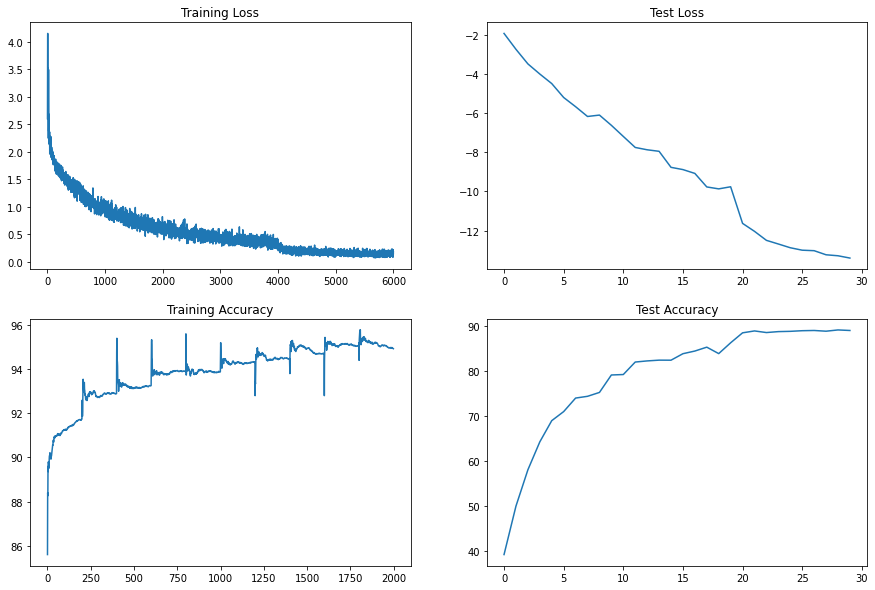

In [0]:
from asgnmt8.ModelPerformance import PlotTrainingGraphs,ViewModelPerformance

PlotTrainingGraphs(tt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 88 %
Accuracy of plane : 100 %
Accuracy of   car : 93 %
Accuracy of  bird : 65 %
Accuracy of   cat : 57 %
Accuracy of  deer : 80 %
Accuracy of   dog : 85 %
Accuracy of  frog : 88 %
Accuracy of horse : 87 %
Accuracy of  ship : 95 %
Accuracy of truck : 93 %


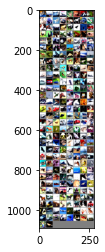

In [0]:
ViewModelPerformance(testloader,net,classes,device)